<a href="https://colab.research.google.com/github/pouyaramezani/ICT/blob/master/comparing_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Imports and configurations

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import math
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 200
!pip install opencv-contrib-python==4.4.0.44
import cv2 as cv
from google.colab.patches import cv2_imshow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[Canny Parameters](https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html)

In [ ]:
# Configration
GUASSIAN_KERNEL_SIZE=(3,3) 
CANNY_MIN_THRESHOLD = 100 #@param {type: "slider", min: 0, max: 1000}
CANNY_MAX_THRESHOLD =200  #@param {type: "slider", min: 0, max: 1000}
MIN_ACCEPTABLE_CONTOUR_LENGTH=1000



# 2- Load the first image
Expand and run the cell and then choose the first file from computer

In [ ]:
uploaded=files.upload()

fname_list=[]
for fn in uploaded.keys():
  fname_list.append(fn)
first_image = fname_list[0]

Saving 19Sep2022-08.23.31-0001.jpg to 19Sep2022-08.23.31-0001 (1).jpg


# 3- Load the second image
Expand and run the cell and choose the second file from computer

In [ ]:
uploaded=files.upload()

fname_list=[]
for fn in uploaded.keys():
  fname_list.append(fn)
second_image = fname_list[0]

Saving t-moved-100-19Sep2022-07.08.20-0001.jpg to t-moved-100-19Sep2022-07.08.20-0001 (1).jpg


# 4- Preparing images

In [ ]:
img_files_list=[first_image,second_image]
img_files=[]

for file_name in img_files_list:
  if file_name[-3:] not in ['jpg','bmp','png','JPG','BMP','PNG','BMP','jpeg','JPEG']:
    print("{file_name} is not an image file".format(file_name)) 
    continue
  img_files.append(file_name)



# 5- Find and show edges for first image
Expand the cell to see the edge find results. 

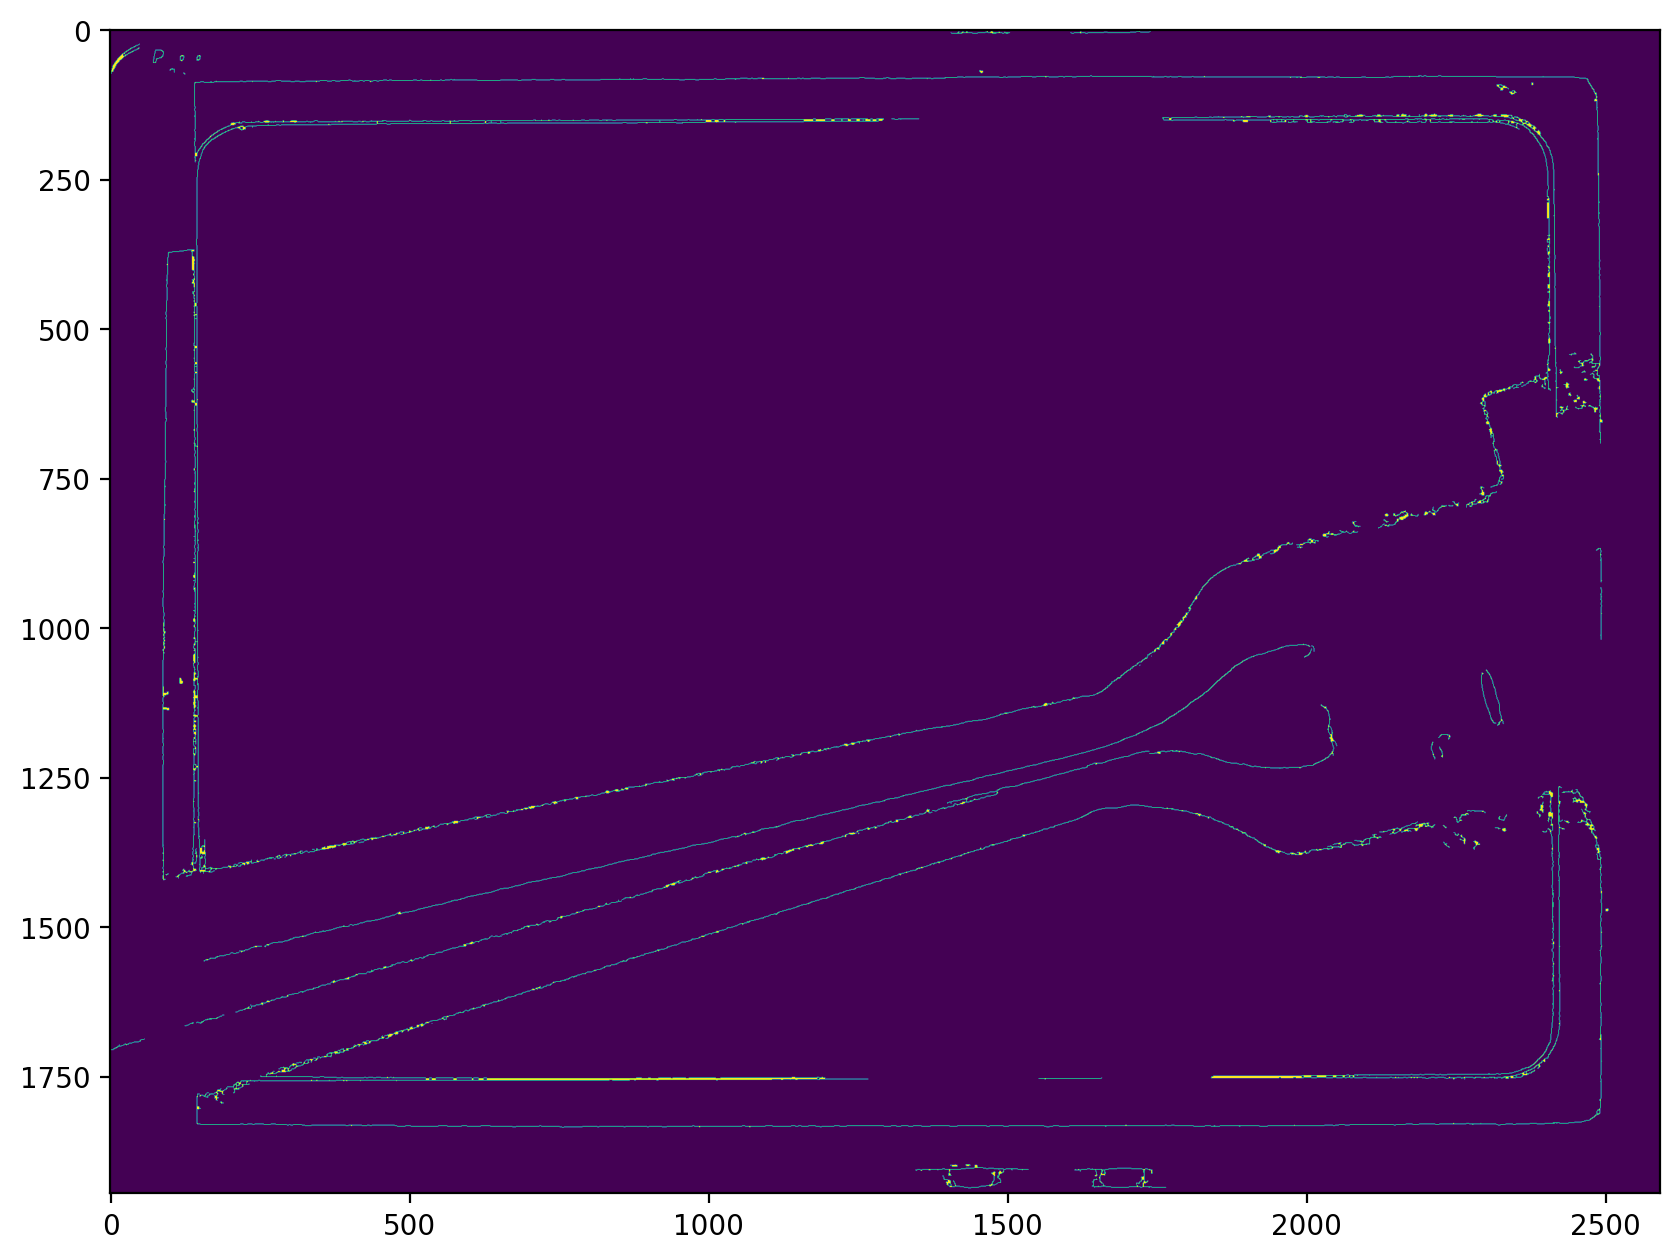

In [ ]:
img_before=cv.imread(img_files[0],0)
filtered_img_before=cv.GaussianBlur(img_before,GUASSIAN_KERNEL_SIZE,0)

edged_before = cv.Canny(filtered_img_before,CANNY_MIN_THRESHOLD,CANNY_MAX_THRESHOLD)

edged_before = cv.dilate(edged_before, None, iterations=1)
edged_before = cv.erode(edged_before, None, iterations=1)

plt.imshow(edged_before)
plt.show()

# 6- Find and show edges for the second image

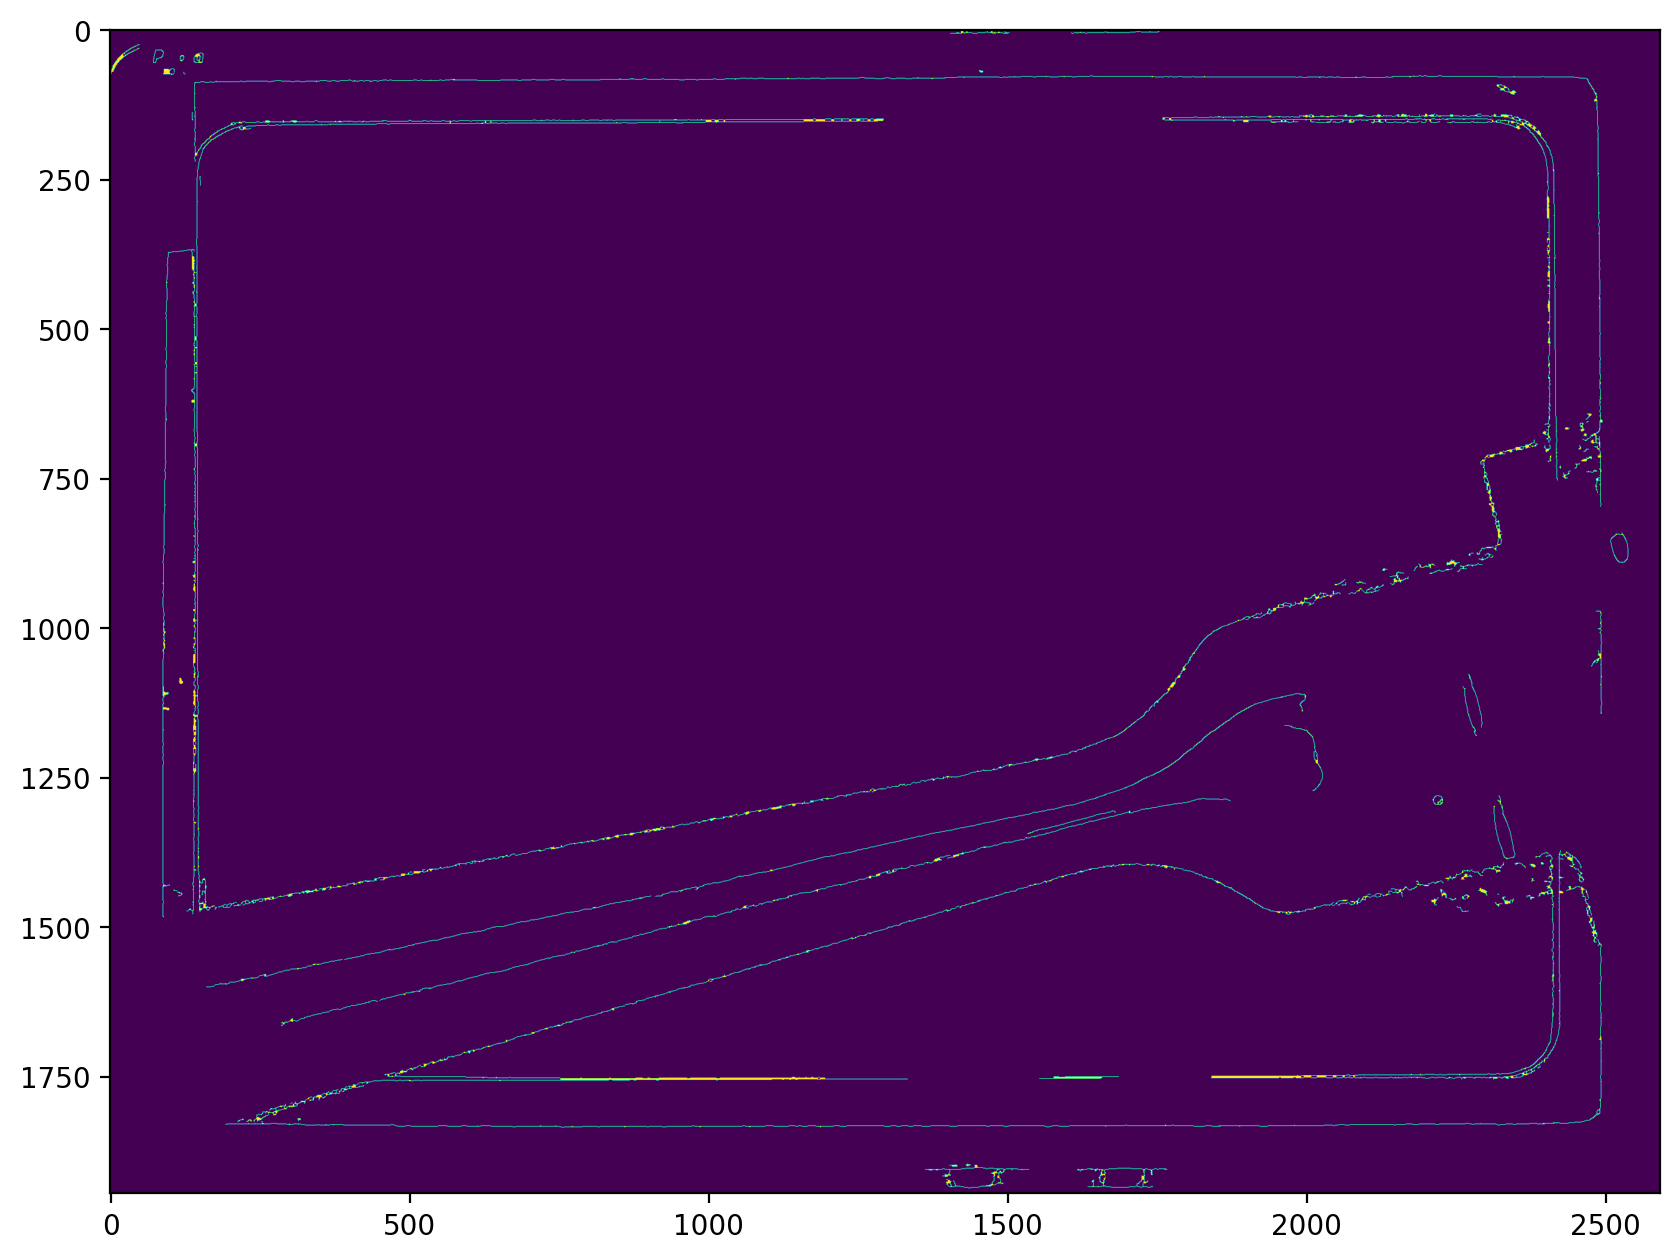

In [ ]:
img_after=cv.imread(img_files[1],0)
filtered_img_after=cv.GaussianBlur(img_after,GUASSIAN_KERNEL_SIZE,0)

edged_after = cv.Canny(filtered_img_after,CANNY_MIN_THRESHOLD,CANNY_MAX_THRESHOLD)

edged_after = cv.dilate(edged_after, None, iterations=1)
edged_after = cv.erode(edged_after, None, iterations=1)


contours_after, hierarchy_after = cv.findContours(edged_after, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

plt.imshow(edged_after)
plt.show()

# 7- Draw edges for first image (gray lines) and second image (white lines) in same image

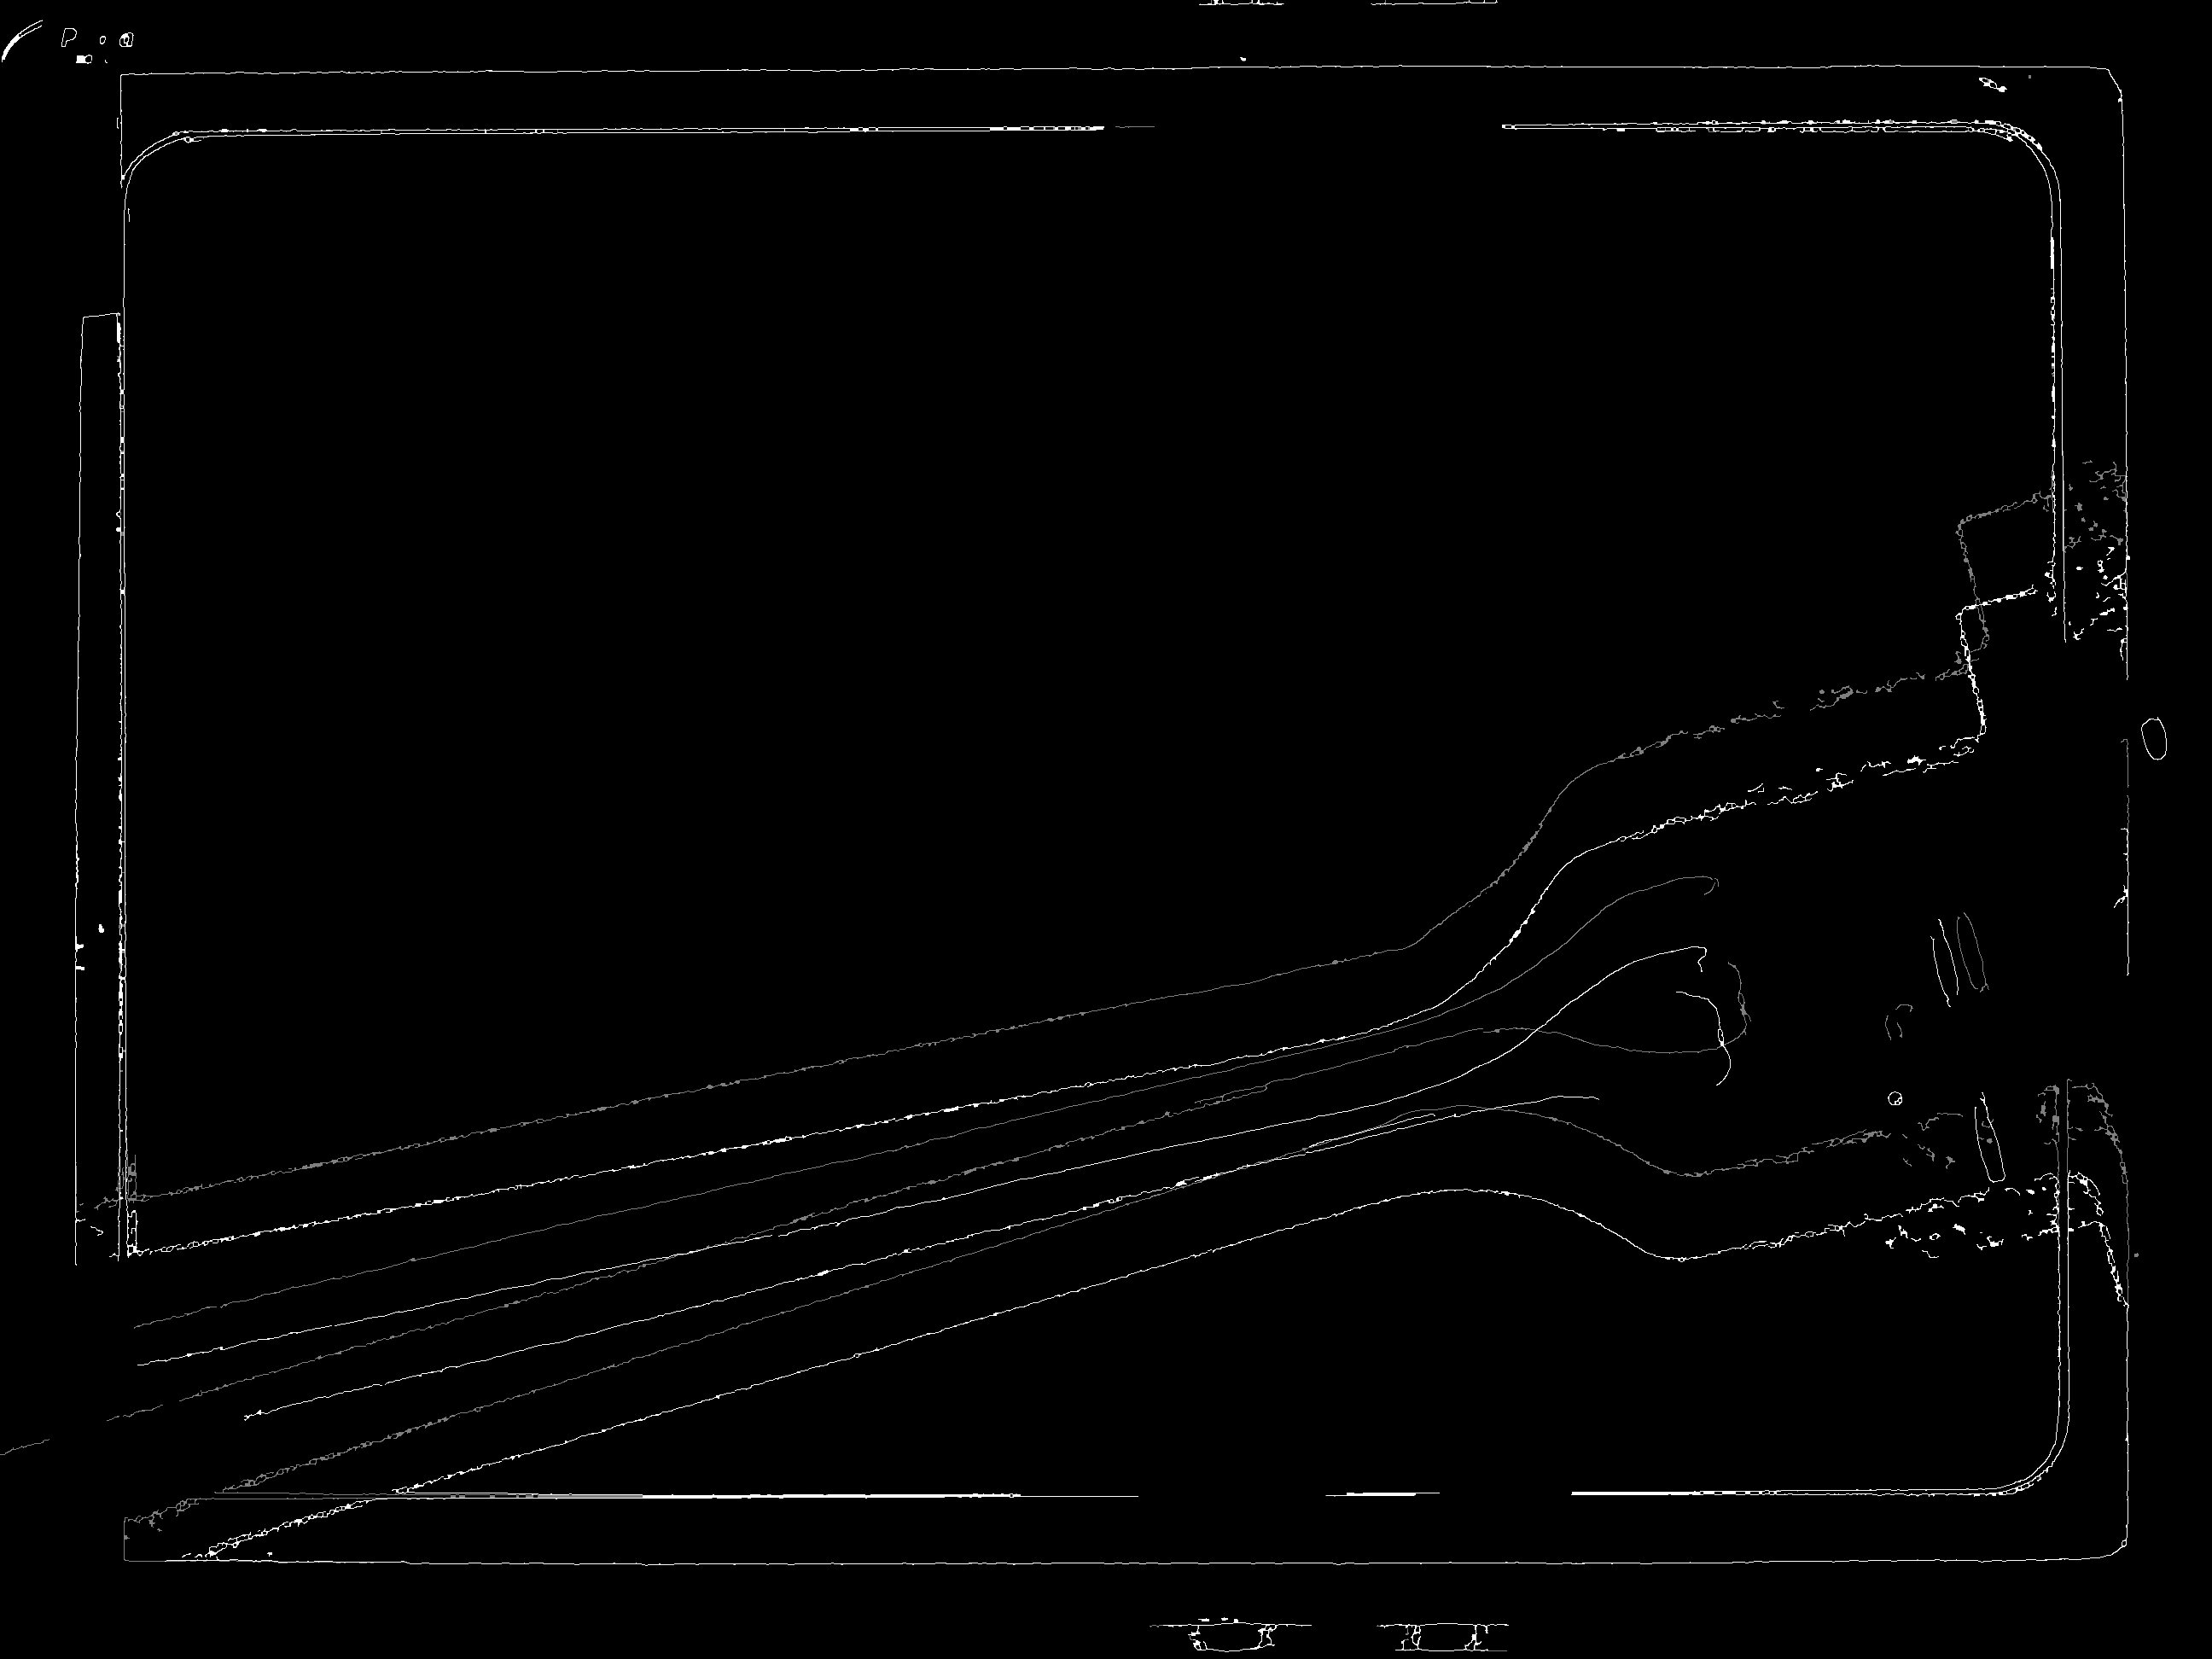

In [ ]:
from PIL import Image
cv2_imshow((edged_before/2)+(4*edged_after))
old_new_img=(edged_before/2)+(4*edged_after)